Identify Person of Interests in Enron Scandal
========================

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives. In this project, I'm going to play detective, and build a person of interest identifier based on financial and email data made public as a result of the Enron scandal.

Understanding the Dataset
------------------------

All available features are classified as POI labels, financial features, and email features:  
(1) ['poi']

(2) financial features: ['salary', 'deferral_payments', 'total_payments', 'loan_advances',  'bonus','restricted_stock_deferred','deferred_income','total_stock_value', 'expenses', 'exercised_stock_options', 'other','long_term_incentive', 'restricted_stock', 'director_fees']

(3) email features: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

In [13]:
#!/usr/bin/python                                                                                                                                

import sys
import pickle
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [14]:
### Task 1: Select what features you'll use.                                                                                                     
### features_list is a list of strings, each of which is a feature name.                                                                         
### The first feature must be "poi".                                          

features_list = ['poi','salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred',\
                 'deferred_income','total_stock_value', 'expenses', 'exercised_stock_options', 'other',\
                 'long_term_incentive', 'restricted_stock', 'director_fees',\
                 'to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi',\
                 'shared_receipt_with_poi']  # You will need to use more features                                                                            

### Load the dictionary containing the dataset                                                                                                   
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    

In [18]:
print data_dict['METTS MARK']

{'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}


Let me reformat data into pandas dataframe.  

In [21]:
df=pd.DataFrame.from_records(list(data_dict.values()))
names=pd.Series(list(data_dict.keys()))
print df.head()

     bonus deferral_payments deferred_income director_fees  \
0   600000               NaN             NaN           NaN   
1  1200000           1295738        -1386055           NaN   
2   350000               NaN         -400729           NaN   
3      NaN               NaN             NaN           NaN   
4  1500000               NaN        -3117011           NaN   

              email_address exercised_stock_options expenses from_messages  \
0      mark.metts@enron.com                     NaN    94299            29   
1                       NaN                 6680544    11200           NaN   
2  steven.elliott@enron.com                 4890344    78552           NaN   
3     bill.cordes@enron.com                  651850      NaN            12   
4    kevin.hannon@enron.com                 5538001    34039            32   

  from_poi_to_this_person from_this_person_to_poi        ...         \
0                      38                       1        ...          
1               

In [34]:
allfeatures = ['poi','salary','to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options',\
                 'bonus', 'restricted_stock','restricted_stock_deferred', 'loan_advances',\
                'deferred_income','total_stock_value', 'expenses', 'other', 'long_term_incentive',\
                 'director_fees', 'from_poi_to_this_person', 'from_messages',\
                'from_this_person_to_poi','shared_receipt_with_poi', 'email_address'] 

ct=[0] * 21
for name in data_dict:   
    for j in range(0,21):
        if data_dict[name][allfeatures[j]]!='NaN':
            ct[j-1]+=1

            
print "Numbers of non NaN data in each feature?"   
for i in range(0,21):
    print  ct[i-1],"\t", allfeatures[i] 

Numbers of non NaN data in each feature?
146 	poi
95 	salary
86 	to_messages
39 	deferral_payments
125 	total_payments
102 	exercised_stock_options
82 	bonus
110 	restricted_stock
18 	restricted_stock_deferred
4 	loan_advances
49 	deferred_income
126 	total_stock_value
95 	expenses
93 	other
66 	long_term_incentive
17 	director_fees
86 	from_poi_to_this_person
86 	from_messages
86 	from_this_person_to_poi
86 	shared_receipt_with_poi
111 	email_address


We can see that several features have missing elements. Let's drop the features with <=80 (can be tuned) non NaN elements. 

In [26]:
drop_list=[]
for i in range(0,21):
    if ct[i-1]<=80:
        a=allfeatures[i]
        drop_list.append(a)

print len(drop_list),drop_list
if drop_list in list(df.columns.values):
    df.drop(drop_list,axis=1,inplace=True)
if 'email_address' in list(df.columns.values):
    df.drop(['email_address'],axis=1,inplace=True)
print df.head()

6 ['deferral_payments', 'restricted_stock_deferred', 'loan_advances', 'deferred_income', 'long_term_incentive', 'director_fees']
     bonus exercised_stock_options expenses from_messages  \
0   600000                     NaN    94299            29   
1  1200000                 6680544    11200           NaN   
2   350000                 4890344    78552           NaN   
3      NaN                  651850      NaN            12   
4  1500000                 5538001    34039            32   

  from_poi_to_this_person from_this_person_to_poi    other    poi  \
0                      38                       1     1740  False   
1                     NaN                     NaN  2660303  False   
2                     NaN                     NaN    12961  False   
3                      10                       0      NaN  False   
4                      32                      21    11350   True   

  restricted_stock  salary shared_receipt_with_poi to_messages total_payments  \
0       

Handling 'NaN' and outliers
-------------------------

In [28]:
df_imp=df.replace(to_replace='NaN',value=0)
df_imp.describe()

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,1.460000e+02,1.460000e+02
mean,1.333474e+06,4.182736e+06,7.074827e+04,358.602740,38.226027,24.287671,5.854318e+05,1.749257e+06,3.658114e+05,692.986301,1221.589041,4.350622e+06,5.846018e+06
std,8.094029e+06,2.607040e+07,4.327163e+05,1441.259868,73.901124,79.278206,3.682345e+06,1.089995e+07,2.203575e+06,1072.969492,2226.770637,2.693448e+07,3.624681e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,-2.604490e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,-4.409300e+04
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,8.115000e+03,0.000000e+00,0.000000,0.000000,9.394475e+04,2.288695e+05
50%,3.000000e+05,6.082935e+05,2.018200e+04,16.500000,2.500000,0.000000,9.595000e+02,3.605280e+05,2.105960e+05,102.500000,289.000000,9.413595e+05,9.659550e+05
75%,8.000000e+05,1.714221e+06,5.374075e+04,51.250000,40.750000,13.750000,1.506065e+05,8.145280e+05,2.708505e+05,893.500000,1585.750000,1.968287e+06,2.319991e+06
max,9.734362e+07,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,4.266759e+07,1.303223e+08,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


By comparing max and .75 quantile we can figure out if there are outliers. It is not very obvious so let's explore the names. 

In [30]:
print data_dict.keys()

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY 

Let's remove 'TOTAL' and 'THE TRAVEL AGENCY IN THE PARK'. 

In [72]:
### Task 2: Remove outliers 
total_ind=data_dict.keys().index('TOTAL')
travel_ind=data_dict.keys().index('THE TRAVEL AGENCY IN THE PARK')
df_sub=df_imp.drop(df_imp.index[[total_ind,travel_ind]])
df_sub.describe()

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,1.440000e+02,1.440000e+02,144.000000,144.000000,144.000000,144.000000,1.440000e+02,1.440000e+02,1.440000e+02,144.000000,144.000000,1.440000e+02,1.440000e+02
mean,6.759974e+05,2.075802e+06,35375.340278,363.583333,38.756944,24.625000,2.947455e+05,8.685363e+05,1.854460e+05,702.611111,1238.555556,2.256543e+06,2.909786e+06
std,1.233155e+06,4.795513e+06,45309.303038,1450.675239,74.276769,79.778266,1.131325e+06,2.016572e+06,1.970421e+05,1077.290736,2237.564816,8.847189e+06,6.189018e+06
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2.604490e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,-4.409300e+04
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.434500e+04,0.000000e+00,0.000000,0.000000,9.019275e+04,2.443265e+05
50%,3.000000e+05,6.082935e+05,20182.000000,17.500000,4.000000,0.000000,9.190000e+02,3.605280e+05,2.105960e+05,114.000000,347.500000,9.413595e+05,9.659550e+05
75%,8.000000e+05,1.683580e+06,53328.250000,53.000000,41.250000,14.000000,1.485770e+05,7.374560e+05,2.696675e+05,933.750000,1623.000000,1.945668e+06,2.295176e+06
max,8.000000e+06,3.434838e+07,228763.000000,14368.000000,528.000000,609.000000,1.035973e+07,1.476169e+07,1.111258e+06,5521.000000,15149.000000,1.035598e+08,4.911008e+07


In [33]:
print df_sub.shape
print "Features:\t",list(df_sub.columns.values)

print "How many POIs:\t",(df_sub['poi']==1).sum()
print "How many nonPOIs:\t",(df_sub['poi']==0).sum()


(144, 14)
Features:	['bonus', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other', 'poi', 'restricted_stock', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']
How many POIs:	18
How many nonPOIs:	126


Visualization
------------

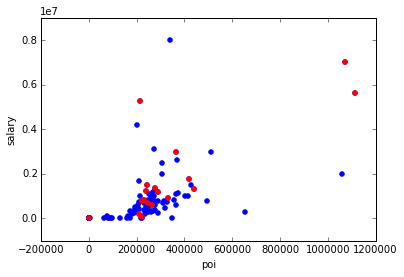

In [71]:
#visulization
dfeatures=['poi','salary','bonus']

def drawXY(df,dfeatures):
    n=len(df)
    X=df[dfeatures[1]]
    Y=df[dfeatures[2]]
    rind=np.nonzero(df[dfeatures[0]])[0]
    plt.scatter(X,Y,color='blue')
    plt.scatter(X[rind],Y[rind],color='red') #if POIs, label red 
         
    plt.xlabel(dfeatures[0])
    plt.ylabel(dfeatures[1])
    plt.show()

drawXY(df_sub,dfeatures)

Create new features
------------------

I update two new features: “from_poi_to_this_person” (fraction_to_poi)  and “from_this_person_to_poi” (fraction_from_poi), which are numbers of messages to/from POI divided by numbers of messages to/from a person, respectively. If a person in general send/receive more emails, then the person is expected to send/receive more emails to/from POIs. So the fraction (of a person receive/send email from/to POIs) is more appropriate than number of emails as a metric to identify additional POIs.   

In [24]:
### Task 3: Create new feature(s) 
def computeFraction(poi_messages,all_messages):
    """ given a number messages to/from POI (numerator)                         
        and number of all messages to/from a person (denominator),              
        return the fraction of messages to/from that person                     
        that are from/to a POI                                                  
    """
    fraction=0.
    if all_messages=='NaN':
        return fraction
    if poi_messages=='NaN':
        poi_messages=0
    fraction=float(poi_messages)/float(all_messages)
    
    return fraction

new_data=data_dict.copy()

for name in new_data:
    data_point=new_data[name]
    from_poi_to_this_person=data_point['from_poi_to_this_person']
    to_messages=data_point['to_messages']
    fraction_from_poi=computeFraction(from_poi_to_this_person,to_messages)
    data_point['fraction_from_poi']=fraction_from_poi
    
    from_this_person_to_poi=data_point['from_this_person_to_poi']
    from_messages=data_point['from_messages']
    fraction_to_poi=computeFraction(from_this_person_to_poi,from_messages)
    data_point['fraction_to_poi']=fraction_to_poi
    
    submit_dict[name]={'from_poi_to_this_person':fraction_from_poi,'from_this_person_to_poi':fraction_to_poi}
    
print data_dict


{'METTS MARK': {'to_messages': 807, 'deferral_payments': 'NaN', 'bonus': 600000, 'total_stock_value': 585062, 'expenses': 94299, 'from_poi_to_this_person': 0.04708798017348203, 'from_this_person_to_poi': 0.034482758620689655, 'poi': False, 'deferred_income': 'NaN', 'restricted_stock': 585062, 'long_term_incentive': 'NaN', 'salary': 365788, 'fraction_from_poi': 5.834941781100623e-05, 'total_payments': 1061827, 'loan_advances': 'NaN', 'email_address': 'mark.metts@enron.com', 'restricted_stock_deferred': 'NaN', 'shared_receipt_with_poi': 702, 'fraction_to_poi': 0.0011890606420927466, 'exercised_stock_options': 'NaN', 'from_messages': 29, 'other': 1740, 'director_fees': 'NaN'}, 'BAXTER JOHN C': {'to_messages': 'NaN', 'deferral_payments': 1295738, 'bonus': 1200000, 'total_stock_value': 10623258, 'expenses': 11200, 'from_poi_to_this_person': 0.0, 'from_this_person_to_poi': 0.0, 'poi': False, 'deferred_income': -1386055, 'restricted_stock': 3942714, 'long_term_incentive': 1586055, 'salary': 2

Feature selection using (1) decision tree and feature_importances, (2) selectKBest and feature scores

In [ ]:
### Store to my_dataset for easy export below.  
# (1) decision tree and feature_importances
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
import sklearn

my_dataset = data_dict
def select10(data):
    #data=[('feature',vale),('feature',value)...]
    
    top=(lambda x: x[i][1]>0.1,data)
    return top

### Extract features and labels from dataset for local testing                                                                                   
def SelectImportances():
    data = featureFormat(my_dataset, features_list[:-1], sort_keys = True) #exclude email_address
    labels, features = targetFeatureSplit(data)  #poi=>labels, rest are features

    train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.1, random_state=42)
    #decision tree
    clf=DecisionTreeClassifier()
    clf.fit(train_features,train_labels)
    pred=clf.predict(test_features)
    accuracy=sklearn.metrics.accuracy_score(pred,test_labels)
    #print "accuracy:\t",accuracy
    importances=clf.feature_importances_
    imp=zip(features_list[:-1],importances)
    imps=sorted(imp,key=lambda x: x[1],reverse=True)
    #select importances>0.1
    return imps[:8]

N=1
ini=SelectImportances()
for i in range(N): #run N times
    imp=SelectImportances()
    print imp
    

I use decision tree to get the importances of the features. The top features with most discriminating power are: [('exercised_stock_options', 0.22060680332739127), ('from_this_person_to_poi', 0.18210753367003366), ('other', 0.13102584257608774), ('deferred_income', 0.11374158249158253)]. The test size is 20% because there are 18 POIs among 146 people. If the test size is too small, it is likely to have no POIs in the test set. Also, I only select features with importances >0.1 because the feature importances changes (from 0.28 to 0.11) whenever I split the train and test sets. 

In [90]:
#SelectKBest
'''
from sklearn.feature_selection import SelectKBest,f_classif #need to figure this out
selector=SelectKBest(f_classif,k=6)
train_newfeatures=selector.fit_transform(train_features,train_labels)
print train_newfeatures
#It works but I am not sure which features are selected
'''

In [77]:
#not applicable for classification (labels are 1 or 0)
#Lasso regression
'''
from sklearn.linear_model import Lasso
reg=Lasso()
reg.fit(train_features,train_labels)
predL=reg.predict(test_features)
print predL
regout=zip(features_list[:-1],reg.coef_)
print sorted(regout,key=lambda x:x[1])
'''

The features I selected have different units so I should deploy feature scaling. 

In [114]:
#Scaling
from sklearn import preprocessing
important_features=['poi','exercised_stock_options','from_this_person_to_poi','deferred_income','other']
data = featureFormat(my_dataset, important_features, sort_keys = True) #exclude email_address
labels, features = targetFeatureSplit(data)  #poi=>labels, rest are features
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.33, random_state=42)
    
min_max_scaler=preprocessing.MinMaxScaler()
train_features_scaled=min_max_scaler.fit_transform(train_features)
test_features_scaled=min_max_scaler.fit_transform(test_features)


In [175]:
### Task 4: Try a varity of classifiers                                                                                                          
### Please name your classifier clf for easy export below.                                                                                       
### Note that if you want to do PCA or other multi-stage operations,  
### you'll need to use Pipelines. For more info:                                                                                                 
### http://scikit-learn.org/stable/modules/pipeline.html                                                                                         
from sklearn import grid_search

# Provided to give you a starting point. Try a variety of classifiers.                                                                           
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB()
clf1.fit(train_features_scaled,train_labels)
pred1=clf1.predict(test_features_scaled)
accuracy1=sklearn.metrics.accuracy_score(pred1,test_labels)
print "Gaussian Naive Bayes accuracy:\t",accuracy1

Gaussian Naive Bayes accuracy:	0.847826086957


In [ ]:
from sklearn.svm import SVC
para2={'kernel':('linear','rbf'),'C':[1,10,20]}
#svr=SVC()
#clf2 = grid_search.GridSearchCV(svr,para2)
#clf2.fit(train_features_scaled,train_labels)
#print "Grid scores:\t",clf2.grid_scores_
#print "Best parameters:\t",clf2.best_params_
cclf2=SVC(kernel='linear',C=1)
cclf2.fit(train_features,train_labels)
pred2=cclf2.predict(test_features)
accuracy2=sklearn.metrics.accuracy_score(pred2,test_labels)
print "SVM accuracy:\t",accuracy2

In [ ]:
clf3 = DecisionTreeClassifier()
clf3.fit(train_features_scaled,train_labels)
pred3=clf3.predict(test_features_scaled)
accuracy3=sklearn.metrics.accuracy_score(pred3,test_labels)
print "Decision Tree accuracy:\t",accuracy3

In [145]:
from sklearn import ensemble  
clf4 = ensemble.AdaBoostClassifier()
clf4.fit(train_features_scaled,train_labels)
pred4=clf4.predict(test_features_scaled)
accuracy4=sklearn.metrics.accuracy_score(pred4,test_labels)
print "AdaBoost accuracy:\t",accuracy4

AdaBoost accuracy:	0.782608695652


In [136]:
clf5=ensemble.RandomForestClassifier()
clf5.fit(train_features_scaled,train_labels)
pred5=clf5.predict(test_features_scaled)
accuracy5=sklearn.metrics.accuracy_score(pred5,test_labels)
print "Random Forest accuracy:\t",accuracy5

Random Forest accuracy:	0.847826086957


In [143]:
from sklearn import neighbors
clf6=neighbors.KNeighborsClassifier()
clf6.fit(train_features_scaled,train_labels)
pred6=clf6.predict(test_features_scaled)
accuracy6=sklearn.metrics.accuracy_score(pred6,test_labels)
print "K Neighbors accuracy:\t",accuracy6

K Neighbors accuracy:	0.869565217391


In [ ]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall                                                                  
### using our testing script. Check the tester.py script in the final project                                                                    
### folder for details on the evaluation method, especially the test_classifier                                                                  
### function. Because of the small size of the dataset, the script uses            
### stratified shuffle split cross validation. For more info:                                                                                    
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html                                        
from tester import test_classifier



In [ ]:
# Example starting point. Try investigating other evaluation techniques!                                                                         
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    
    

In [ ]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can                                                                       
### check your results. You do not need to change anything below, but make sure                                                                  
### that the version of poi_id.py that you submit can be run on its own and                                                                      
### generates the necessary .pkl files for validating your results.                                                                              

dump_classifier_and_data(clf, my_dataset, features_list)